### Definition of patches and read images

In [4]:
from skimage import io

folders = ['bag','bear','book','camel','rhino','swan']
folder_img = './sequences-train/' + folders[4] + '/'

In [5]:
import numpy as np
import os
def listdir_nohidden(path):
    l1 = []
    l2 = []
    for f in np.sort(os.listdir(path)) :
        if f.startswith('.') == False :
            if '.png' in f:
                l1.append(f)
            if '.bmp' in f:
                l2.append(f)
    return l1,l2

In [6]:
from skimage.transform import resize
import matplotlib.pyplot as plt



list_mask, list_im = listdir_nohidden(folder_img)
image = io.imread(folder_img+list_im[1])
l = len(list_im)
imgs = np.ndarray((l, image.shape[0], image.shape[1], 3), dtype=np.float32)
masks = np.ndarray((l, image.shape[0], image.shape[1], 1), dtype=np.float32)
idxs = []

for idx, id_ in enumerate(list_im):
    name = id_.split('.')[0]
    img = io.imread(folder_img + name + '.bmp')
    mask = io.imread(folder_img + name + '.png')
    imgs[idx,:,:,:] = resize(img,(img.shape[0], img.shape[1], 3),mode='reflect',preserve_range=True)
    masks[idx,:,:,0] = resize(mask,(img.shape[0], img.shape[1]),mode='reflect',preserve_range=True).astype(np.bool_)
    idxs.append(name)

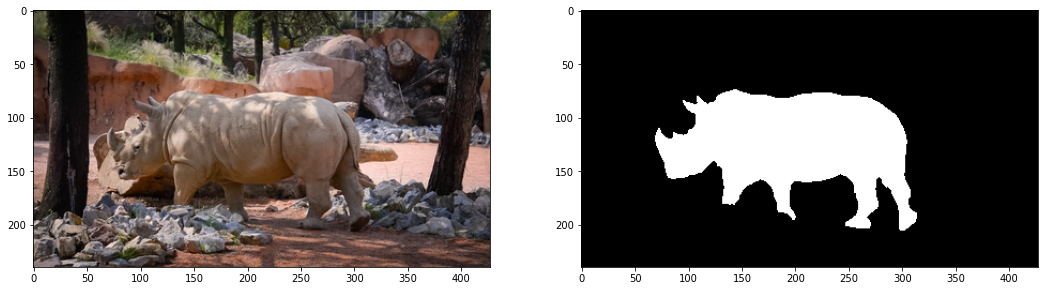

In [7]:
from skimage.exposure import rescale_intensity

plt.figure(figsize=(18,6))
plt.subplot(1,2,1)
plt.imshow(rescale_intensity(imgs[0], in_range=(np.min(imgs[0]),np.max(imgs[0])), out_range=(0,1)))
plt.subplot(1,2,2)
plt.imshow(np.uint8(masks[0,:,:,0]), cmap='gray')
plt.show()


In [8]:
def normalization(imgs):
    imgs = imgs.astype('float32', copy=False)
    length_ = imgs.shape[0]
    
    for i in range(length_):
        imgs[i] = (imgs[i] - imgs[i].mean()) / imgs[i].var()
        
    
normalization(imgs)

In [9]:
from skimage.measure import regionprops_table, regionprops
from skimage import data, util
from skimage.measure import label

def boundingboxes(mask_):
    
    length_ = mask_.shape[0]
    xmin = np.zeros(length_)
    xmax = np.zeros(length_)
    ymin = np.zeros(length_)
    ymax = np.zeros(length_)
    for i in range(length_):
        prop = regionprops(np.uint8(mask_[i,:,:,0]))
        xmin[i] = prop[0].bbox[0]
        xmax[i] = prop[0].bbox[2]
        ymin[i] = prop[0].bbox[1]
        ymax[i] = prop[0].bbox[3]
        
    return xmin,xmax,ymin,ymax 

In [10]:
from skimage.segmentation import find_boundaries, mark_boundaries

In [11]:
xmin,xmax,ymin,ymax = boundingboxes(masks) #min row, min col, max row, max col

In [12]:
def visualize_predicted_box(img, xmin, xmax, ymin, ymax):
    img = rescale_intensity(img, in_range=(np.min(img),np.max(img)), out_range=(0,1))
    box = np.zeros((img.shape[0], img.shape[1]), dtype=np.uint8)
    box[xmin:xmax+1, ymin:ymax+1] = 1
    out = mark_boundaries(img, box, color=(0, 1, 0), mode='thick')
    return out

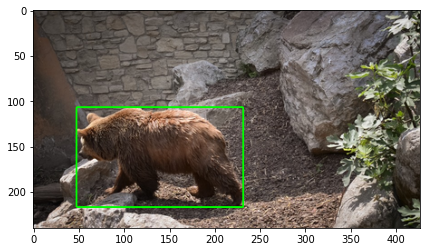

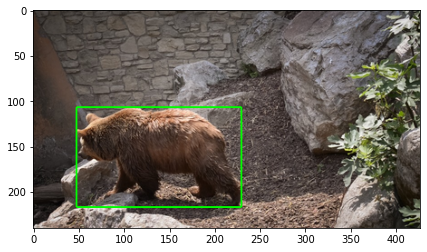

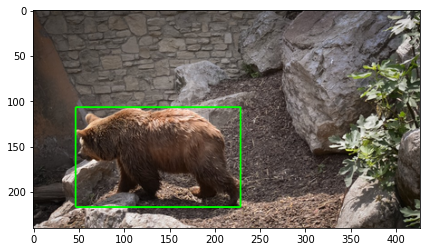

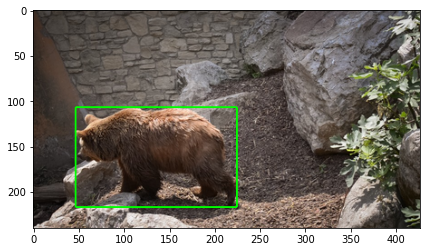

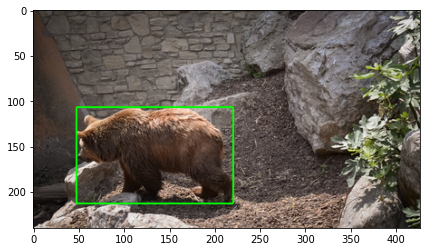

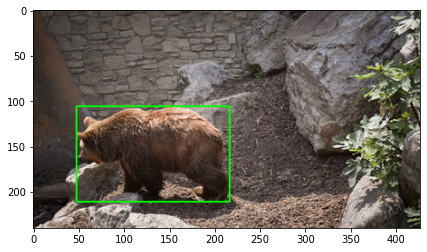

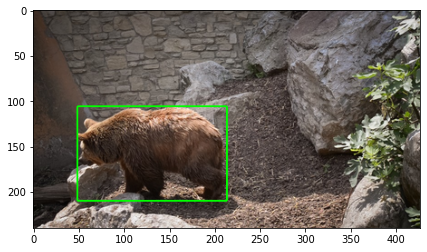

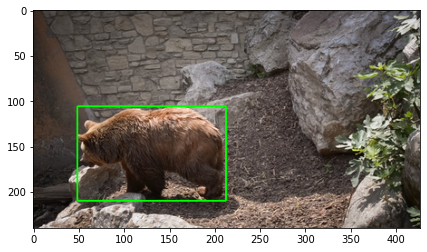

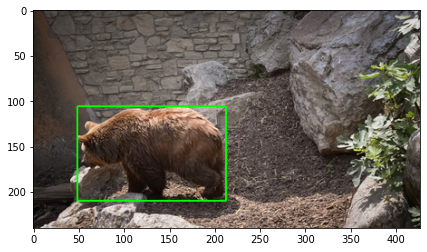

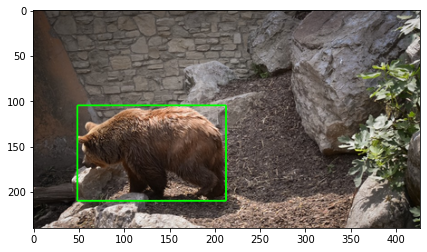

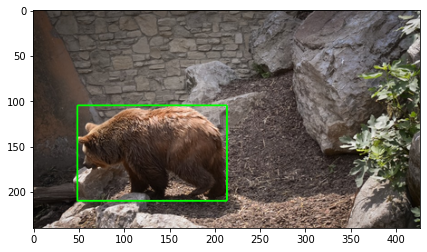

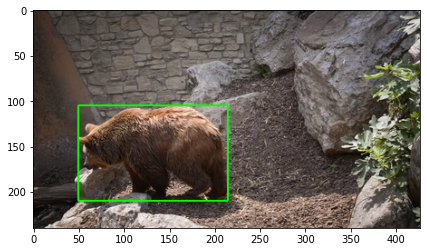

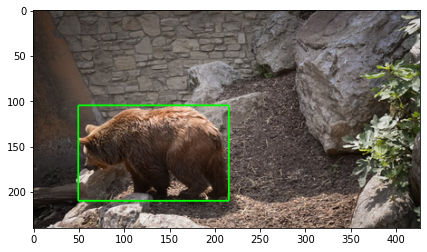

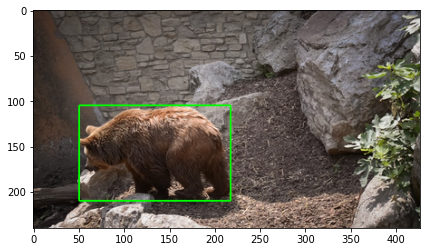

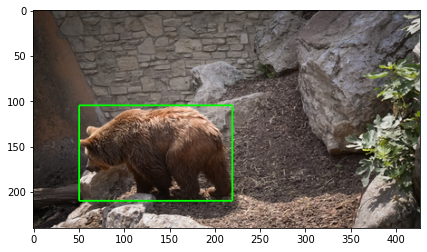

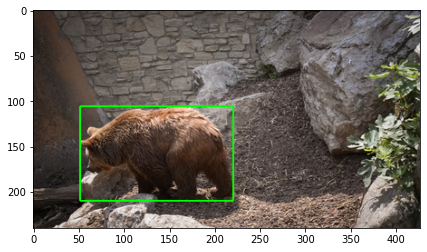

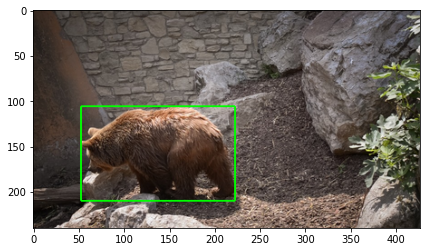

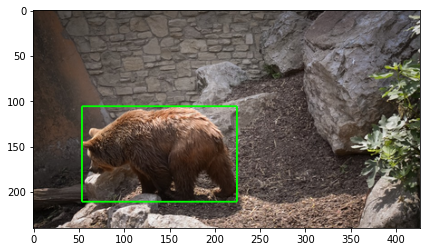

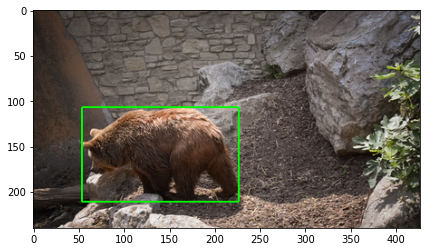

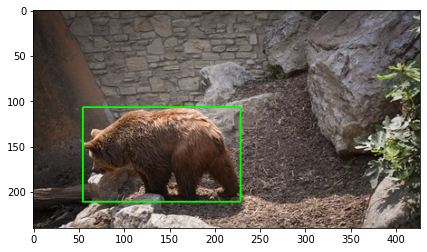

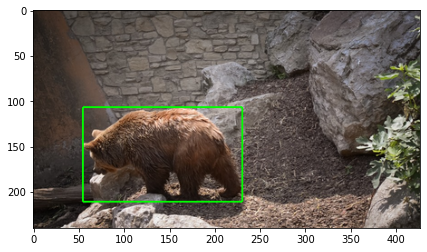

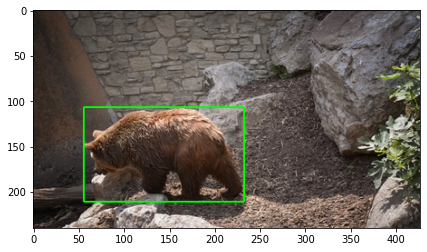

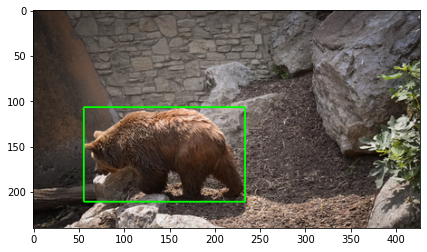

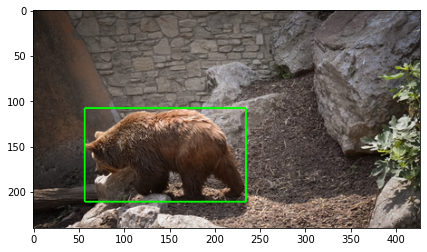

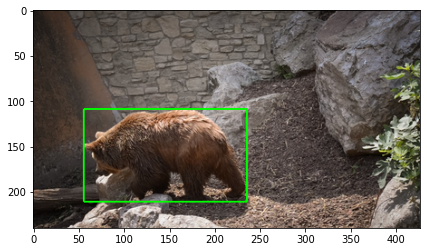

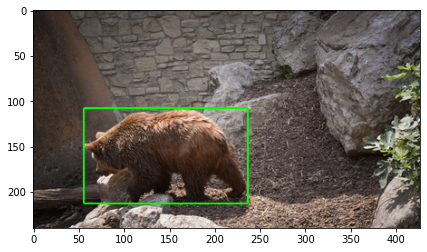

In [20]:
for i in range(len(list_im)):
    plt.figure(figsize=(18, 4))
    plt.imshow(visualize_predicted_box(imgs[i,:,:,:], int(xmin[i]), int(xmax[i]), int(ymin[i]), int(ymax[i])))
    plt.show()

## Code to create the groundtruth file

In [17]:
bb_file = open("../pygoturn/our_data/"+folders[4]+"/groundtruth_rect.txt","w") 

for i in range(len(list_im)):
    bb_file.writelines(str(int(ymin[i]))+','+ str(int(xmin[i]))+','+ str(int(ymax[i])-int(ymin[i]))+','+ str(int(xmax[i])-int(xmin[i]))+'\n')

bb_file.close()

## Code to eliminate the masks from the image directory

In [19]:
import os
#bb_file = open("../pygoturn/our_data/bag/img","w") 

for file in os.listdir('../pygoturn/our_data/'+folders[4]+'/img/'): 
    if file.endswith('.png'):
        os.remove('../pygoturn/our_data/'+folders[4]+'/img/'+file)

In [22]:
for folder in folders:
    folder_img = './sequences-train/' + folder + '/'
    
    list_mask, list_im = listdir_nohidden(folder_img)
    
    image = io.imread(folder_img+list_im[1])
    l = len(list_im)
    imgs = np.ndarray((l, image.shape[0], image.shape[1], 3), dtype=np.float32)
    masks = np.ndarray((l, image.shape[0], image.shape[1], 1), dtype=np.float32)
    idxs = []

    for idx, id_ in enumerate(list_im):
        name = id_.split('.')[0]
        img = io.imread(folder_img + name + '.bmp')
        mask = io.imread(folder_img + name + '.png')
        imgs[idx,:,:,:] = resize(img,(img.shape[0], img.shape[1], 3),mode='reflect',preserve_range=True)
        masks[idx,:,:,0] = resize(mask,(img.shape[0], img.shape[1]),mode='reflect',preserve_range=True).astype(np.bool_)
        idxs.append(name)

    xmin,xmax,ymin,ymax = boundingboxes(masks)
    
    bb_file = open("../pygoturn/sequences-train/"+folder+"/groundtruth_rect.txt","w") 

    for i in range(len(list_im)):
        bb_file.writelines(str(int(ymin[i]))+','+ str(int(xmin[i]))+','+ str(int(ymax[i])-int(ymin[i]))+','+ str(int(xmax[i])-int(xmin[i]))+'\n')
    bb_file.close()
    
    for file in os.listdir('../pygoturn/sequences-train/'+folder+'/img/'): 
        if file.endswith('.png'):
            os.remove('../pygoturn/sequences-train/'+folder+'/img/'+file)